## Блок заданий 1 - обзорка

In [3]:
!hdfs dfs -put ../randomBullCrab/lolita.txt /temp

In [4]:
!hdfs dfs -cat /temp/lolita.txt

Часть I

1

Лолита, свет моей жизни, огонь моих чресел. Грех мой, душа моя. Ло-ли-та: кончик языка совершает путь в три шажка вниз по небу, чтобы на третьем толкнуться о зубы. Ло. Ли. Та.

Она была Ло, просто Ло, по утрам, ростом в пять футов (без двух вершков и в одном носке). Она была Лола в длинных штанах. Она была Долли в школе. Она была Долорес на пунктире бланков. Но в моих объятьях она была всегда: Лолита.

А предшественницы-то у нее были? Как же - были... Больше скажу: и Лолиты бы не оказалось никакой, если бы я не полюбил в одно далекое лето одну изначальную девочку. В некотором княжестве у моря (почти как у По).

Когда же это было, а?

Приблизительно за столько же лет до рождения Лолиты, сколько мне было в то лето. Можете всегда положиться на убийцу в отношении затейливости прозы.

Уважаемые присяжные женского и мужеского пола! Экспонат Номер Первый представляет собой то, чему так завидовали Эдгаровы серафимы - худо осведомленные, простодушные, благороднокрылые серафимы... По

In [5]:
!hadoop jar /opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.6.jar pi 15 1800

Number of Maps  = 15
Samples per Map = 1800
Wrote input for Map #0
Wrote input for Map #1
Wrote input for Map #2
Wrote input for Map #3
Wrote input for Map #4
Wrote input for Map #5
Wrote input for Map #6
Wrote input for Map #7
Wrote input for Map #8
Wrote input for Map #9
Wrote input for Map #10
Wrote input for Map #11
Wrote input for Map #12
Wrote input for Map #13
Wrote input for Map #14
Starting Job
2023-11-30 18:39:14 INFO  DefaultNoHARMFailoverProxyProvider:64 - Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
2023-11-30 18:39:14 INFO  JobResourceUploader:907 - Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701354480326_0001
2023-11-30 18:39:14 INFO  FileInputFormat:300 - Total input files to process : 15
2023-11-30 18:39:14 INFO  JobSubmitter:202 - number of splits:15
2023-11-30 18:39:14 INFO  JobSubmitter:298 - Submitting tokens for job: job_1701354480326_0001
2023-11-30 18:39:14 INFO  JobSubmitter:299 - Executing with tokens: []


## Блок заданий 2 - мапред

In [6]:
## mapred module

### задание 1 - болтун находка для шпиона империи

In [22]:
#boltun 

In [11]:
!pip install mrjob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 KB 2.8 MB/s eta 0:00:00a 0:00:01


In [12]:
from zipfile import PyZipFile
from mrjob.job import MRJob

In [9]:
sw_zip_path = "../randomBullCrab/sw.zip"
sw_zip = PyZipFile(sw_zip_path)
sw_zip.extractall("../randomBullCrab/sw/")

In [8]:
%%file ../randomBullCrab/boltunCount.py
from mrjob.job import MRJob, MRStep
from string import punctuation

class MRBoltunCount(MRJob):
    # def __init__(self):
    #     # self.counter = 0
    #     super().__init__()

    def check_header(self, line):
        return len(line.split('" "')) == 2

    def remove_punct(self, line):
        for character in punctuation:
            line = line.replace(character, '')
        return line
    
    def mapper_extract_chatters(self, _, line):
        if self.check_header(line):
            yield ('', 0)
        else:
            num, person, speech = line.lower().split('" "')
            num = num[1:]
            speech = self.remove_punct(speech[:-1]).split(" ")
            num_words = len(speech)
            # yield (person, num_words)
            yield (person, 1)

    def reducer_sum_speechs(self, word, values):
        yield None, (sum(values), word)

    def reduce_sort_counts(self, _, word_counts):
        counter = 0
        for count, person in sorted(word_counts, reverse=True):
            if counter < 20:
                counter += 1
                yield (person, int(count))

    def steps(self):
        return [
            MRStep(
                mapper=self.mapper_extract_chatters, 
                reducer=self.reducer_sum_speechs
            ),
            MRStep(
                reducer=self.reduce_sort_counts
            )
        ]

if __name__ == "__main__":
    MRBoltunCount.run()

Overwriting ../randomBullCrab/boltunCount.py


In [9]:
%%file config.conf

runners:
  hadoop: # also works for emr runner
    jobconf:
      mapreduce.job.queuename: jupyter

Writing config.conf


In [46]:
!python3 ../randomBullCrab/boltunCount.py ../randomBullCrab/sw/SW_EpisodeIV.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/boltunCount.root.20231203.150251.284306
Running step 1 of 2...

Error while reading from /tmp/boltunCount.root.20231203.150251.284306/step/000/mapper/00047/input:

Traceback (most recent call last):
  File "/opt/notebooks/../randomBullCrab/boltunCount.py", line 50, in <module>
    MRBoltunCount.run()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 616, in run
    cls().execute()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 687, in execute
    self.run_job()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 636, in run_job
    runner.run()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/runner.py", line 503, in run
    self._run()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/sim.py", line 161, in _run
    self._run_step(step, step_num)
  File "/usr/local/lib/python3.10/dist-packages/mrjob/sim.

In [47]:
!hdfs dfs -mkdir /sw

In [48]:
!hdfs dfs -put ../randomBullCrab/sw/* /sw

In [13]:
!python3 ../randomBullCrab/boltunCount.py -r hadoop hdfs://namenode:8020/sw/ --conf-path config.conf --output hdfs://namenode:8020/output_boltun

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/boltunCount.root.20231204.125405.804349
uploading working dir files to hdfs:///user/root/tmp/mrjob/boltunCount.root.20231204.125405.804349/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/boltunCount.root.20231204.125405.804349/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar5496325237308743841/] [] /tmp/streamjob8528962691194510235.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701354480326_0010
  Total input files to process : 3
  number of splits:3
  Submitting tokens for job: job_1

In [56]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 8.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 10.3 MB/s eta 0:00:0000:0100:01


In [58]:
!hadoop classpath --glob

/opt/hadoop/etc/hadoop:/opt/hadoop/share/hadoop/common/lib/jackson-core-asl-1.9.13.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-ssl-ocsp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jersey-servlet-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/dnsjava-2.1.7.jar:/opt/hadoop/share/hadoop/common/lib/commons-beanutils-1.9.4.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-classes-epoll-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jetty-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/kerby-config-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/stax2-api-4.2.1.jar:/opt/hadoop/share/hadoop/common/lib/token-provider-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jakarta.activation-api-1.2.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-redis-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jersey-json-1.20.jar:/opt/hadoop/share/hadoop/common/lib/curator-recipes-5.2.0.jar:

In [1]:
import os
os.environ['CLASSPATH'] = "/opt/hadoop/etc/hadoop:/opt/hadoop/share/hadoop/common/lib/jackson-core-asl-1.9.13.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-ssl-ocsp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jersey-servlet-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/dnsjava-2.1.7.jar:/opt/hadoop/share/hadoop/common/lib/commons-beanutils-1.9.4.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-classes-epoll-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jetty-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/kerby-config-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/stax2-api-4.2.1.jar:/opt/hadoop/share/hadoop/common/lib/token-provider-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jakarta.activation-api-1.2.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-redis-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jersey-json-1.20.jar:/opt/hadoop/share/hadoop/common/lib/curator-recipes-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/commons-codec-1.15.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-proxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jsp-api-2.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-configuration2-2.8.0.jar:/opt/hadoop/share/hadoop/common/lib/gson-2.9.0.jar:/opt/hadoop/share/hadoop/common/lib/jetty-security-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/protobuf-java-2.5.0.jar:/opt/hadoop/share/hadoop/common/lib/commons-lang3-3.12.0.jar:/opt/hadoop/share/hadoop/common/lib/jsr305-3.0.2.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-http-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/guava-27.0-jre.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-http2-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/woodstox-core-5.4.0.jar:/opt/hadoop/share/hadoop/common/lib/kerb-admin-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/audience-annotations-0.5.0.jar:/opt/hadoop/share/hadoop/common/lib/kerb-core-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/kerby-asn1-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jaxb-api-2.2.11.jar:/opt/hadoop/share/hadoop/common/lib/commons-text-1.10.0.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-annotations-3.3.6.jar:/opt/hadoop/share/hadoop/common/lib/netty-all-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/slf4j-api-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-epoll-4.1.89.Final-linux-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/paranamer-2.3.jar:/opt/hadoop/share/hadoop/common/lib/netty-buffer-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jackson-core-2.12.7.jar:/opt/hadoop/share/hadoop/common/lib/jackson-databind-2.12.7.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-haproxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/j2objc-annotations-1.1.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-auth-3.3.6.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-classes-macos-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-rxtx-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jetty-http-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/commons-daemon-1.0.13.jar:/opt/hadoop/share/hadoop/common/lib/jettison-1.5.4.jar:/opt/hadoop/share/hadoop/common/lib/curator-client-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/commons-compress-1.21.jar:/opt/hadoop/share/hadoop/common/lib/netty-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jersey-server-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/kerb-util-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-collections-3.2.2.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-mqtt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/javax.servlet-api-3.1.0.jar:/opt/hadoop/share/hadoop/common/lib/commons-logging-1.1.3.jar:/opt/hadoop/share/hadoop/common/lib/jaxb-impl-2.2.3-1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-smtp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/animal-sniffer-annotations-1.17.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-shaded-guava-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/listenablefuture-9999.0-empty-to-avoid-conflict-with-guava.jar:/opt/hadoop/share/hadoop/common/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/jetty-xml-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/zookeeper-3.6.3.jar:/opt/hadoop/share/hadoop/common/lib/netty-handler-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerb-simplekdc-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/metrics-core-3.2.4.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-classes-kqueue-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/curator-framework-5.2.0.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-unix-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jetty-util-ajax-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/jsch-0.1.55.jar:/opt/hadoop/share/hadoop/common/lib/jackson-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/common/lib/commons-io-2.8.0.jar:/opt/hadoop/share/hadoop/common/lib/reload4j-1.2.22.jar:/opt/hadoop/share/hadoop/common/lib/failureaccess-1.0.jar:/opt/hadoop/share/hadoop/common/lib/kerb-crypto-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jersey-core-1.19.4.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-socks-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-udt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/httpclient-4.5.13.jar:/opt/hadoop/share/hadoop/common/lib/checker-qual-2.5.2.jar:/opt/hadoop/share/hadoop/common/lib/kerby-xdr-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-kqueue-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/common/lib/jul-to-slf4j-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/avro-1.7.7.jar:/opt/hadoop/share/hadoop/common/lib/nimbus-jose-jwt-9.8.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-math3-3.1.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-xml-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerb-common-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-net-3.9.0.jar:/opt/hadoop/share/hadoop/common/lib/hadoop-shaded-protobuf_3_7-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/jetty-util-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/jetty-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/jetty-io-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/jsr311-api-1.1.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-stomp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/zookeeper-jute-3.6.3.jar:/opt/hadoop/share/hadoop/common/lib/kerb-identity-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/slf4j-reload4j-1.7.36.jar:/opt/hadoop/share/hadoop/common/lib/kerb-client-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/commons-cli-1.2.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-kqueue-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/httpcore-4.4.13.jar:/opt/hadoop/share/hadoop/common/lib/re2j-1.1.jar:/opt/hadoop/share/hadoop/common/lib/kerb-server-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/jackson-mapper-asl-1.9.13.jar:/opt/hadoop/share/hadoop/common/lib/kerby-util-1.0.1.jar:/opt/hadoop/share/hadoop/common/lib/netty-codec-memcache-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/snappy-java-1.1.8.2.jar:/opt/hadoop/share/hadoop/common/lib/jcip-annotations-1.0-1.jar:/opt/hadoop/share/hadoop/common/lib/jetty-webapp-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-native-epoll-4.1.89.Final-linux-aarch_64.jar:/opt/hadoop/share/hadoop/common/lib/netty-transport-sctp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/common/lib/kerby-pkix-1.0.1.jar:/opt/hadoop/share/hadoop/common/hadoop-nfs-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-common-3.3.6-tests.jar:/opt/hadoop/share/hadoop/common/hadoop-registry-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-kms-3.3.6.jar:/opt/hadoop/share/hadoop/common/hadoop-common-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs:/opt/hadoop/share/hadoop/hdfs/lib/jackson-core-asl-1.9.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-ssl-ocsp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-servlet-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/dnsjava-2.1.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-beanutils-1.9.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-classes-epoll-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-3.10.6.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-config-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/stax2-api-4.2.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/token-provider-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jakarta.activation-api-1.2.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-redis-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-json-1.20.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-recipes-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-codec-1.15.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-proxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-configuration2-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/gson-2.9.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-security-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/protobuf-java-2.5.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-lang3-3.12.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsr305-3.0.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-http-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/guava-27.0-jre.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-http2-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/woodstox-core-5.4.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-admin-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/audience-annotations-0.5.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-core-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-asn1-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jaxb-api-2.2.11.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-text-1.10.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-annotations-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-all-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-epoll-4.1.89.Final-linux-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/paranamer-2.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-buffer-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-core-2.12.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-databind-2.12.7.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-haproxy-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/j2objc-annotations-1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-auth-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-classes-macos-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-rxtx-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-http-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-daemon-1.0.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/jettison-1.5.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-client-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-compress-1.21.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-server-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-util-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-collections-3.2.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-mqtt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kotlin-stdlib-common-1.4.10.jar:/opt/hadoop/share/hadoop/hdfs/lib/javax.servlet-api-3.1.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-logging-1.1.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/jaxb-impl-2.2.3-1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-smtp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/animal-sniffer-annotations-1.17.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-shaded-guava-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/listenablefuture-9999.0-empty-to-avoid-conflict-with-guava.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-resolver-dns-native-macos-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-xml-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/zookeeper-3.6.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-handler-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-simplekdc-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/metrics-core-3.2.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-classes-kqueue-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/curator-framework-5.2.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-unix-common-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-util-ajax-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/HikariCP-java7-2.4.12.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsch-0.1.55.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-io-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/reload4j-1.2.22.jar:/opt/hadoop/share/hadoop/hdfs/lib/failureaccess-1.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-crypto-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/json-simple-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jersey-core-1.19.4.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-socks-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-udt-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/httpclient-4.5.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/checker-qual-2.5.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-xdr-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-kqueue-4.1.89.Final-osx-x86_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/avro-1.7.7.jar:/opt/hadoop/share/hadoop/hdfs/lib/nimbus-jose-jwt-9.8.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-math3-3.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/kotlin-stdlib-1.4.10.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-xml-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-common-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/okhttp-4.9.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-net-3.9.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/hadoop-shaded-protobuf_3_7-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/okio-2.8.0.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-util-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-io-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-dns-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/jsr311-api-1.1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-stomp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/zookeeper-jute-3.6.3.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-identity-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-client-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/commons-cli-1.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-kqueue-4.1.89.Final-osx-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/httpcore-4.4.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/re2j-1.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerb-server-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jackson-mapper-asl-1.9.13.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-util-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-codec-memcache-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/snappy-java-1.1.8.2.jar:/opt/hadoop/share/hadoop/hdfs/lib/jcip-annotations-1.0-1.jar:/opt/hadoop/share/hadoop/hdfs/lib/jetty-webapp-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-native-epoll-4.1.89.Final-linux-aarch_64.jar:/opt/hadoop/share/hadoop/hdfs/lib/leveldbjni-all-1.8.jar:/opt/hadoop/share/hadoop/hdfs/lib/netty-transport-sctp-4.1.89.Final.jar:/opt/hadoop/share/hadoop/hdfs/lib/kerby-pkix-1.0.1.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-client-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-rbf-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-rbf-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-nfs-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-native-client-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-httpfs-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-native-client-3.3.6.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-3.3.6-tests.jar:/opt/hadoop/share/hadoop/hdfs/hadoop-hdfs-client-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-hs-plugins-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-jobclient-3.3.6-tests.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-shuffle-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-app-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-nativetask-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-uploader-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-jobclient-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-common-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-hs-3.3.6.jar:/opt/hadoop/share/hadoop/mapreduce/hadoop-mapreduce-client-core-3.3.6.jar:/opt/hadoop/share/hadoop/yarn:/opt/hadoop/share/hadoop/yarn/lib/guice-4.0.jar:/opt/hadoop/share/hadoop/yarn/lib/jline-3.9.0.jar:/opt/hadoop/share/hadoop/yarn/lib/aopalliance-1.0.jar:/opt/hadoop/share/hadoop/yarn/lib/asm-commons-9.4.jar:/opt/hadoop/share/hadoop/yarn/lib/jersey-client-1.19.4.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-plus-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/java-util-1.9.0.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.websocket-client-api-1.0.jar:/opt/hadoop/share/hadoop/yarn/lib/ehcache-3.3.1.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-jaxrs-json-provider-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-api-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/mssql-jdbc-6.2.1.jre7.jar:/opt/hadoop/share/hadoop/yarn/lib/guice-servlet-4.0.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-servlet-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/json-io-2.5.1.jar:/opt/hadoop/share/hadoop/yarn/lib/javax-websocket-server-impl-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-annotations-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/fst-2.50.jar:/opt/hadoop/share/hadoop/yarn/lib/jna-5.2.0.jar:/opt/hadoop/share/hadoop/yarn/lib/swagger-annotations-1.5.4.jar:/opt/hadoop/share/hadoop/yarn/lib/objenesis-2.6.jar:/opt/hadoop/share/hadoop/yarn/lib/bcprov-jdk15on-1.68.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-server-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jersey-guice-1.19.4.jar:/opt/hadoop/share/hadoop/yarn/lib/snakeyaml-2.0.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-jndi-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.inject-1.jar:/opt/hadoop/share/hadoop/yarn/lib/jetty-client-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-jaxrs-base-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-client-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/javax.websocket-api-1.0.jar:/opt/hadoop/share/hadoop/yarn/lib/javax-websocket-client-impl-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/websocket-common-9.4.51.v20230217.jar:/opt/hadoop/share/hadoop/yarn/lib/bcpkix-jdk15on-1.68.jar:/opt/hadoop/share/hadoop/yarn/lib/jakarta.xml.bind-api-2.3.2.jar:/opt/hadoop/share/hadoop/yarn/lib/asm-tree-9.4.jar:/opt/hadoop/share/hadoop/yarn/lib/jackson-module-jaxb-annotations-2.12.7.jar:/opt/hadoop/share/hadoop/yarn/lib/geronimo-jcache_1.0_spec-1.0-alpha-1.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-services-api-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-mawo-core-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-unmanaged-am-launcher-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-services-core-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-tests-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-router-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-sharedcachemanager-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-applicationhistoryservice-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-common-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-web-proxy-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-client-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-api-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-timeline-pluginstorage-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-resourcemanager-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-common-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-server-nodemanager-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-applications-distributedshell-3.3.6.jar:/opt/hadoop/share/hadoop/yarn/hadoop-yarn-registry-3.3.6.jar"

In [2]:
from pyarrow import fs
hdfs = fs.HadoopFileSystem("namenode", 8020)

In [14]:
with hdfs.open_input_stream("/output_boltun/part-00000") as file:
    data = file.readall().decode("utf-8")

In [32]:
results_boltun = [(k[1:-1], int(v)) for k, v in [val.split("\t") for val in data.split("\n")[:-1]]]
results_boltun

[('luke', 494),
 ('han', 459),
 ('threepio', 301),
 ('leia', 227),
 ('vader', 140),
 ('ben', 115),
 ('lando', 101),
 ('yoda', 49),
 ('emperor', 44),
 ('red leader', 38),
 ('biggs', 34),
 ('wedge', 33),
 ('piett', 31),
 ('tarkin', 28),
 ('jabba', 26),
 ('owen', 25),
 ('creature', 22),
 ('trooper', 19),
 ('gold leader', 14),
 ('ackbar', 14)]

In [24]:
!pip install mat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 10.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 9.1 MB/s eta 0:00:00


In [25]:
import matplotlib.pyplot as plt

In [39]:
res_chars = [res[0].capitalize() for res in results_boltun]
res_speechs = [res[1] for res in results_boltun]

<BarContainer object of 20 artists>

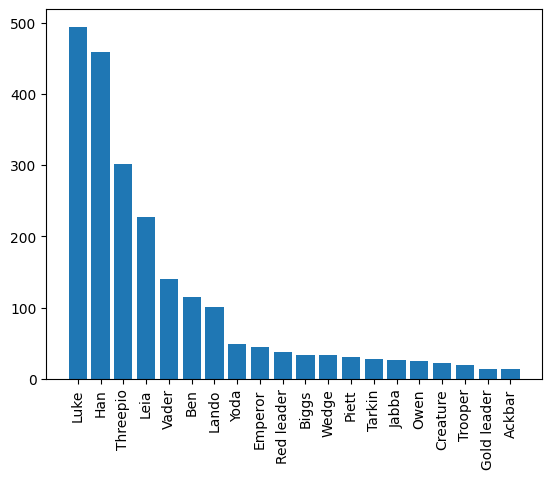

In [40]:
plt.xticks(rotation=90)
plt.bar(res_chars, res_speechs)

### Задание 2 - воодушевляющая речь

In [41]:
##inspire

In [104]:
%%file ../randomBullCrab/inspireCount.py
from mrjob.job import MRJob, MRStep
from string import punctuation

class MRInspireCount(MRJob):
    # def __init__(self):
    #     # self.counter = 0
    #     super().__init__()

    def check_header(self, line):
        return len(line.split('" "')) == 2

    def remove_punct(self, line):
        for character in punctuation:
            line = line.replace(character, '')
        return line
    
    def mapper_extract_chatters(self, _, line):
        if self.check_header(line):
            yield ('', ("", 0))
        else:
            num, person, speech = line.lower().split('" "')
            num = num[1:]
            speech = speech[:-1]
            speech_tokens = self.remove_punct(speech[:-1]).split(" ")
            num_words = len(speech_tokens)
            yield (person, (speech, num_words))
            # yield (person, 1)

    def reducer_longest_speech(self, person, speeches):
        longest_speech = ""
        longest_len = 0
        
        for idx, speech_len in enumerate(speeches):
            
            speech, len_speech = speech_len
            if len_speech > longest_len:
                longest_speech = speech
                longest_len = len_speech
        yield None, (longest_speech, person)

    def reduce_sort_counts(self, _, speech_counts):
        for speech, person in sorted(speech_counts, key=lambda k: len(k[0].split(" ")), reverse=True):
            # person, speech = person_speech
            yield (person, speech)

    def steps(self):
        return [
            MRStep(
                mapper=self.mapper_extract_chatters, 
                reducer=self.reducer_longest_speech
            ),
            MRStep(
                reducer=self.reduce_sort_counts
            )
        ]

if __name__ == "__main__":
    MRInspireCount.run()

Overwriting ../randomBullCrab/inspireCount.py


In [105]:
!python3 ../randomBullCrab/inspireCount.py ../randomBullCrab/sw/SW_EpisodeIV.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/inspireCount.root.20231204.165421.834753
Running step 1 of 2...
Running step 2 of 2...
job output is in /tmp/inspireCount.root.20231204.165421.834753/output
Streaming final output from /tmp/inspireCount.root.20231204.165421.834753/output...
"leia"	"general kenobi, years ago you served my father in the clone wars.  now he begs you to help him in his struggle against the empire.  i regret that i am unable to present my father's request to you in person, but my ship has fallen under attack and i'm afraid my mission to bring you to alderaan has failed.  i have placed information vital to the survival of the rebellion into the memory systems of this r2 unit.  my father will know how to retrieve it.  you must see this droid safely delivered to him on alderaan.  this is our most desperate hour.  help me, obi-wan kenobi, you're my only hope."
"jabba"	"put your blasters away.

#### часть 1 - подсчёт для всего корпуса

In [106]:
!python3 ../randomBullCrab/inspireCount.py -r hadoop hdfs://namenode:8020/sw/ --conf-path config.conf --output hdfs://namenode:8020/output_inspire_total

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/inspireCount.root.20231204.165654.238509
uploading working dir files to hdfs:///user/root/tmp/mrjob/inspireCount.root.20231204.165654.238509/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/inspireCount.root.20231204.165654.238509/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar3667386811001153525/] [] /tmp/streamjob806428892132613378.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701354480326_0014
  Total input files to process : 3
  number of splits:3
  Submitting tokens for job: job

In [107]:
with hdfs.open_input_stream("/output_inspire_total/part-00000") as file:
    speeches = file.readall().decode("utf-8")
print(speeches)

"ben"	"the organa household was high-born and politically quite powerful in that system. leia became a princess by virtue of lineage... no one knew she'd been adopted, of course. but it was a title without real power, since alderaan had long been a democracy.  even so, the family continued to be politically powerful, and leia, following in her foster father's path, became a senator as well.  that's not all she became, of course... she became the leader of her cell in the alliance against the corrupt empire. and because she had diplomatic immunity, she was a vital link for getting information to the rebel cause.  that's what she was doing when her path crossed yours... for her foster parents had always told her to contact me on tatooine, if her troubles became desperate."
"leia"	"general kenobi, years ago you served my father in the clone wars.  now he begs you to help him in his struggle against the empire.  i regret that i am unable to present my father's request to you in person, but

#### часть 2 - подсчёт для 4 эпизода

In [108]:
!python3 ../randomBullCrab/inspireCount.py -r hadoop hdfs://namenode:8020/sw/SW_EpisodeIV.txt --conf-path config.conf --output hdfs://namenode:8020/output_inspire_iv

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/inspireCount.root.20231204.170022.885163
uploading working dir files to hdfs:///user/root/tmp/mrjob/inspireCount.root.20231204.170022.885163/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/inspireCount.root.20231204.170022.885163/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar3115277211809404468/] [] /tmp/streamjob7285032017813802315.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701354480326_0016
  Total input files to process : 1
  number of splits:2
  Submitting tokens for job: jo

In [109]:
with hdfs.open_input_stream("/output_inspire_iv/part-00000") as file:
    speech_iv = file.readall().decode("utf-8")
print(speech_iv)

"leia"	"general kenobi, years ago you served my father in the clone wars.  now he begs you to help him in his struggle against the empire.  i regret that i am unable to present my father's request to you in person, but my ship has fallen under attack and i'm afraid my mission to bring you to alderaan has failed.  i have placed information vital to the survival of the rebellion into the memory systems of this r2 unit.  my father will know how to retrieve it.  you must see this droid safely delivered to him on alderaan.  this is our most desperate hour.  help me, obi-wan kenobi, you're my only hope."
"jabba"	"put your blasters away.  han, my boy, i'm only doing this because you're the best and i need you.  so, for an extra, say... twenty percent i'll give you a little more time... but this is it.  if you disappoint me again, i'll put a price on your head so large you won't be able to go near a civilized system for the rest of your short life."
"luke"	"... so i cut off my power, shut down

#### часть 3 - подсчёт для 5 эпизода

In [110]:
!python3 ../randomBullCrab/inspireCount.py -r hadoop hdfs://namenode:8020/sw/SW_EpisodeV.txt --conf-path config.conf --output hdfs://namenode:8020/output_inspire_v

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/inspireCount.root.20231204.170140.135585
uploading working dir files to hdfs:///user/root/tmp/mrjob/inspireCount.root.20231204.170140.135585/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/inspireCount.root.20231204.170140.135585/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar6927371219076801296/] [] /tmp/streamjob5362265696966928123.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701354480326_0018
  Total input files to process : 1
  number of splits:2
  Submitting tokens for job: jo

In [112]:
with hdfs.open_input_stream("/output_inspire_v/part-00000") as file:
    speech_v = file.readall().decode("utf-8")
print(speech_v)

"yoda"	"ready, are you? what know you of ready? for eight hundred years  have i trained jedi. my own counsel will i keep on who is to be trained! a jedi must have the deepest commitment, the most serious mind.  this one a long time have i watched. never his mind on where he was. hmm? what he was doing. hmph. adventure. heh! excitement. heh! a jedi craves not these things.  you are reckless!"
"vader"	"there is no escape. don't make me destroy you. you do not yet  realize your importance. you have only begun to discover you power. join me and i will complete your training. with our combined strength, we can end this destructive conflict and bring order to the galaxy."
"leia"	"all troop carriers will assemble at the north entrance. the  heavy transport ships will leave as soon as they're loaded. only two fighter escorts per ship. the energy shield can only be opened for a short time, so you'll have to stay very close to your transports."
"threepio"	"don't try to blame me. i didn't ask you

#### часть 4 - подсчёт для 6 эпизода

In [113]:
!python3 ../randomBullCrab/inspireCount.py -r hadoop hdfs://namenode:8020/sw/SW_EpisodeVI.txt --conf-path config.conf --output hdfs://namenode:8020/output_inspire_vi

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/inspireCount.root.20231204.170719.465171
uploading working dir files to hdfs:///user/root/tmp/mrjob/inspireCount.root.20231204.170719.465171/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/inspireCount.root.20231204.170719.465171/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar6307243655365692258/] [] /tmp/streamjob5290934247808162978.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701354480326_0020
  Total input files to process : 1
  number of splits:2
  Submitting tokens for job: jo

In [114]:
with hdfs.open_input_stream("/output_inspire_vi/part-00000") as file:
    speech_vi = file.readall().decode("utf-8")
print(speech_vi)

"ben"	"the organa household was high-born and politically quite powerful in that system. leia became a princess by virtue of lineage... no one knew she'd been adopted, of course. but it was a title without real power, since alderaan had long been a democracy.  even so, the family continued to be politically powerful, and leia, following in her foster father's path, became a senator as well.  that's not all she became, of course... she became the leader of her cell in the alliance against the corrupt empire. and because she had diplomatic immunity, she was a vital link for getting information to the rebel cause.  that's what she was doing when her path crossed yours... for her foster parents had always told her to contact me on tatooine, if her troubles became desperate."
"luke"	"greetings, exalted one. allow me to introduce myself. i am luke skywalker, jedi knight and friend to captain solo. i know that you are powerful, mighty jabba, and that your anger with solo must be equally power

### Задание 3 - Кто о чём, а ситх об абсолюте

In [115]:
##absolute

In [116]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 3.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 KB 9.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 6.5 MB/s eta 0:00:00


In [139]:
%%file ../randomBullCrab/absoluteCount.py
from mrjob.job import MRJob, MRStep
from string import punctuation
import nltk

class MRAbsoluteCount(MRJob):

    def check_header(self, line):
        return len(line.split('" "')) == 2

    def lemmatize(self, word):
        return nltk.stem.PorterStemmer().stem(word)

    def remove_punct(self, line):
        for character in punctuation:
            line = line.replace(character, '')
        return line

    def bigramize(self, words):
        return list(nltk.bigrams(words))

    def mapper_init(self):
     nltk.download('punkt')
     nltk.download('stopwords')
    
    def mapper_extract_bigrams(self, _, line):
        self.mapper_init()
        if self.check_header(line):
            yield ('', 0)
        else:
            num, person, speech = line.lower().split('" "')
            num = num[1:]
            speech = speech[:-1]
            speech_tokens = [self.lemmatize(tok) for tok in self.remove_punct(speech[:-1]).split(" ") 
                             if tok not in nltk.corpus.stopwords.words('english') and len(tok) > 0]
            bigrams = self.bigramize(speech_tokens)
            for bigram in bigrams:    
                yield (bigram, 1)
            # yield (person, 1)

    def reducer_sum_bigrams(self, word, values):
        yield None, (sum(values), word)

    def reduce_sort_counts(self, _, bigram_counts):
        counter = 0
        for count, bigram in sorted(bigram_counts, reverse=True):
            if counter < 20:
                counter += 1
                yield (bigram, int(count))

    def steps(self):
        return [
            MRStep(
                mapper=self.mapper_extract_bigrams, 
                reducer=self.reducer_sum_bigrams
            ),
            MRStep(
                reducer=self.reduce_sort_counts
            )
        ]

if __name__ == "__main__":
    MRAbsoluteCount.run()

Overwriting ../randomBullCrab/absoluteCount.py


In [140]:
!python3 ../randomBullCrab/absoluteCount.py ../randomBullCrab/sw/SW_EpisodeIV.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/absoluteCount.root.20231204.182214.769971
Running step 1 of 2...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] D

In [142]:
%%file config.conf

runners:
  hadoop: 
    setup:
        "pip install nltk"
    jobconf:
      mapreduce.job.queuename: jupyter

Overwriting config.conf


#### часть 1 - подсчёт для всего корпуса

In [143]:
!python3 ../randomBullCrab/absoluteCount.py -r hadoop hdfs://namenode:8020/sw/ --conf-path config.conf --output hdfs://namenode:8020/output_absolute_total

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/absoluteCount.root.20231204.183305.011268
uploading working dir files to hdfs:///user/root/tmp/mrjob/absoluteCount.root.20231204.183305.011268/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/absoluteCount.root.20231204.183305.011268/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar5640000073032806101/] [] /tmp/streamjob581136033915605990.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701354480326_0023
  Total input files to process : 3
  number of splits:3
  Submitting tokens for job: 

In [144]:
with hdfs.open_input_stream("/output_absolute_total/part-00000") as file:
    bigrams = file.readall().decode("utf-8")
print(bigrams)

["dont", "know"]	29
["lord", "vader"]	26
["im", "go"]	26
["master", "luke"]	23
["dark", "side"]	20
["let", "go"]	18
["ive", "got"]	15
["dont", "worri"]	14
["death", "star"]	14
["your", "go"]	13
["weve", "got"]	13
["luke", "luke"]	13
["look", "like"]	13
["dont", "think"]	13
["come", "back"]	13
["ye", "sir"]	12
["r2", "unit"]	12
["obiwan", "kenobi"]	12
["battl", "station"]	12
["rebel", "base"]	11



In [145]:
bigrams

'["dont", "know"]\t29\n["lord", "vader"]\t26\n["im", "go"]\t26\n["master", "luke"]\t23\n["dark", "side"]\t20\n["let", "go"]\t18\n["ive", "got"]\t15\n["dont", "worri"]\t14\n["death", "star"]\t14\n["your", "go"]\t13\n["weve", "got"]\t13\n["luke", "luke"]\t13\n["look", "like"]\t13\n["dont", "think"]\t13\n["come", "back"]\t13\n["ye", "sir"]\t12\n["r2", "unit"]\t12\n["obiwan", "kenobi"]\t12\n["battl", "station"]\t12\n["rebel", "base"]\t11\n'

In [148]:
results_bigrams = [(" ".join(eval(k)), int(v)) for k, v in [val.split("\t") for val in bigrams.split("\n")[:-1]]]
results_bigrams

[('dont know', 29),
 ('lord vader', 26),
 ('im go', 26),
 ('master luke', 23),
 ('dark side', 20),
 ('let go', 18),
 ('ive got', 15),
 ('dont worri', 14),
 ('death star', 14),
 ('your go', 13),
 ('weve got', 13),
 ('luke luke', 13),
 ('look like', 13),
 ('dont think', 13),
 ('come back', 13),
 ('ye sir', 12),
 ('r2 unit', 12),
 ('obiwan kenobi', 12),
 ('battl station', 12),
 ('rebel base', 11)]

In [149]:
res_bigrams = [res[0] for res in results_bigrams]
res_nums = [res[1] for res in results_bigrams]

<BarContainer object of 20 artists>

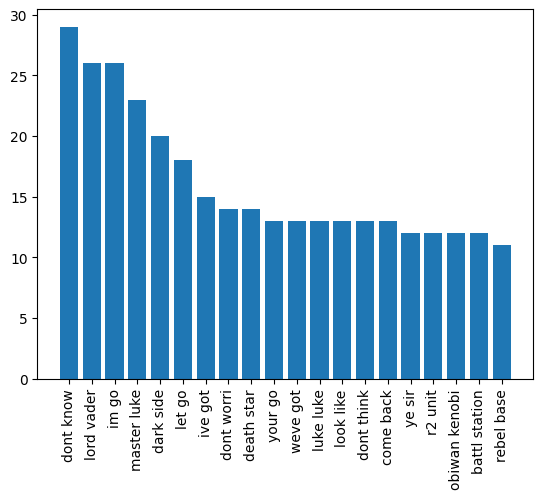

In [150]:
plt.xticks(rotation=90)
plt.bar(res_bigrams, res_nums)

#### часть 2 - подсчёт для 4 эпизода

In [151]:
!python3 ../randomBullCrab/absoluteCount.py -r hadoop hdfs://namenode:8020/sw/SW_EpisodeIV.txt --conf-path config.conf --output hdfs://namenode:8020/output_absolute_iv

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/absoluteCount.root.20231204.184537.637157
uploading working dir files to hdfs:///user/root/tmp/mrjob/absoluteCount.root.20231204.184537.637157/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/absoluteCount.root.20231204.184537.637157/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar834929149936998599/] [] /tmp/streamjob1879480607931347947.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701354480326_0025
  Total input files to process : 1
  number of splits:2
  Submitting tokens for job: 

In [152]:
with hdfs.open_input_stream("/output_absolute_iv/part-00000") as file:
    bigrams = file.readall().decode("utf-8")
print(bigrams)

["im", "go"]	13
["obiwan", "kenobi"]	12
["rebel", "base"]	11
["r2", "unit"]	11
["dont", "know"]	11
["sand", "peopl"]	10
["look", "like"]	10
["ive", "got"]	10
["battl", "station"]	10
["luke", "luke"]	9
["your", "go"]	8
["let", "go"]	8
["uncl", "owen"]	7
["lord", "vader"]	7
["dont", "worri"]	7
["come", "back"]	7
["weve", "got"]	6
["red", "leader"]	6
["old", "man"]	6
["know", "he"]	6



In [153]:
results_bigrams = [(" ".join(eval(k)), int(v)) for k, v in [val.split("\t") for val in bigrams.split("\n")[:-1]]]
results_bigrams


[('im go', 13),
 ('obiwan kenobi', 12),
 ('rebel base', 11),
 ('r2 unit', 11),
 ('dont know', 11),
 ('sand peopl', 10),
 ('look like', 10),
 ('ive got', 10),
 ('battl station', 10),
 ('luke luke', 9),
 ('your go', 8),
 ('let go', 8),
 ('uncl owen', 7),
 ('lord vader', 7),
 ('dont worri', 7),
 ('come back', 7),
 ('weve got', 6),
 ('red leader', 6),
 ('old man', 6),
 ('know he', 6)]

In [154]:
res_bigrams = [res[0] for res in results_bigrams]
res_nums = [res[1] for res in results_bigrams]

<BarContainer object of 20 artists>

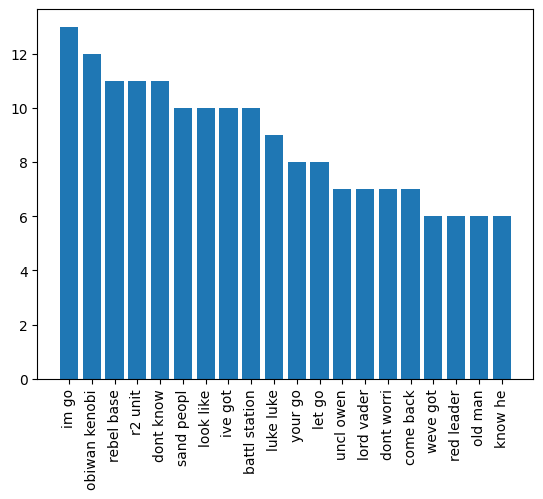

In [155]:
plt.xticks(rotation=90)
plt.bar(res_bigrams, res_nums)

#### часть 3 - подсчёт 5 эпизода

In [156]:
!python3 ../randomBullCrab/absoluteCount.py -r hadoop hdfs://namenode:8020/sw/SW_EpisodeV.txt --conf-path config.conf --output hdfs://namenode:8020/output_absolute_v

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/absoluteCount.root.20231204.184742.837025
uploading working dir files to hdfs:///user/root/tmp/mrjob/absoluteCount.root.20231204.184742.837025/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/absoluteCount.root.20231204.184742.837025/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar1325895730489180213/] [] /tmp/streamjob3878015403630629672.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701354480326_0027
  Total input files to process : 1
  number of splits:2
  Submitting tokens for job:

In [157]:
with hdfs.open_input_stream("/output_absolute_v/part-00000") as file:
    bigrams = file.readall().decode("utf-8")
print(bigrams)

["lord", "vader"]	14
["im", "go"]	12
["dont", "know"]	12
["ye", "lord"]	9
["dark", "side"]	7
["bounti", "hunter"]	7
["asteroid", "field"]	7
["star", "destroy"]	6
["master", "luke"]	6
["let", "go"]	6
["captain", "solo"]	6
["take", "care"]	5
["roug", "two"]	5
["millennium", "falcon"]	5
["im", "tri"]	5
["im", "sure"]	5
["im", "sorri"]	5
["energi", "shield"]	5
["come", "around"]	5
["ye", "sir"]	4



In [158]:
results_bigrams = [(" ".join(eval(k)), int(v)) for k, v in [val.split("\t") for val in bigrams.split("\n")[:-1]]]
results_bigrams


[('lord vader', 14),
 ('im go', 12),
 ('dont know', 12),
 ('ye lord', 9),
 ('dark side', 7),
 ('bounti hunter', 7),
 ('asteroid field', 7),
 ('star destroy', 6),
 ('master luke', 6),
 ('let go', 6),
 ('captain solo', 6),
 ('take care', 5),
 ('roug two', 5),
 ('millennium falcon', 5),
 ('im tri', 5),
 ('im sure', 5),
 ('im sorri', 5),
 ('energi shield', 5),
 ('come around', 5),
 ('ye sir', 4)]

In [159]:
res_bigrams = [res[0] for res in results_bigrams]
res_nums = [res[1] for res in results_bigrams]

<BarContainer object of 20 artists>

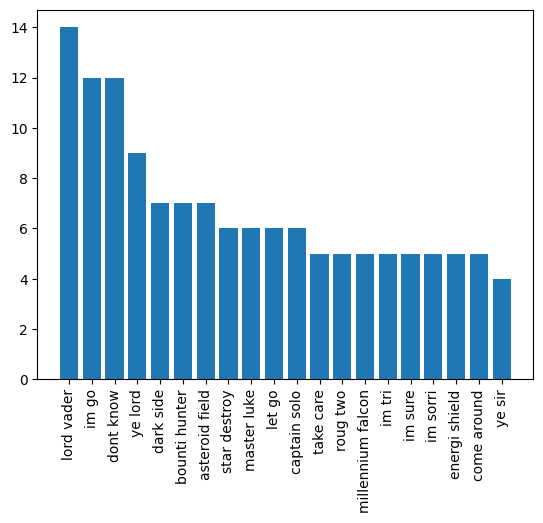

In [160]:
plt.xticks(rotation=90)
plt.bar(res_bigrams, res_nums)

#### часть 4 - подсчёт для 6 эпизода

In [161]:
!python3 ../randomBullCrab/absoluteCount.py -r hadoop hdfs://namenode:8020/sw/SW_EpisodeVI.txt --conf-path config.conf --output hdfs://namenode:8020/output_absolute_vi

Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/absoluteCount.root.20231204.185138.371678
uploading working dir files to hdfs:///user/root/tmp/mrjob/absoluteCount.root.20231204.185138.371678/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/absoluteCount.root.20231204.185138.371678/files/
Running step 1 of 2...
  packageJobJar: [/tmp/hadoop-unjar1760183608478525813/] [] /tmp/streamjob7423170829906611789.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Connecting to ResourceManager at resourcemanager/172.19.0.8:8032
  Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1701354480326_0029
  Total input files to process : 1
  number of splits:2
  Submitting tokens for job:

In [162]:
with hdfs.open_input_stream("/output_absolute_vi/part-00000") as file:
    bigrams = file.readall().decode("utf-8")
print(bigrams)

["master", "luke"]	13
["dark", "side"]	12
["death", "star"]	9
["oh", "oh"]	8
["gold", "leader"]	6
["dont", "know"]	6
["shield", "gener"]	5
["lord", "vader"]	5
["captain", "solo"]	5
["turn", "dark"]	4
["star", "destroy"]	4
["shuttl", "tydirium"]	4
["oh", "dear"]	4
["like", "father"]	4
["let", "go"]	4
["jabba", "hutt"]	4
["gener", "solo"]	4
["dont", "think"]	4
["dont", "move"]	4
["deflector", "shield"]	4



In [163]:
results_bigrams = [(" ".join(eval(k)), int(v)) for k, v in [val.split("\t") for val in bigrams.split("\n")[:-1]]]
results_bigrams


[('master luke', 13),
 ('dark side', 12),
 ('death star', 9),
 ('oh oh', 8),
 ('gold leader', 6),
 ('dont know', 6),
 ('shield gener', 5),
 ('lord vader', 5),
 ('captain solo', 5),
 ('turn dark', 4),
 ('star destroy', 4),
 ('shuttl tydirium', 4),
 ('oh dear', 4),
 ('like father', 4),
 ('let go', 4),
 ('jabba hutt', 4),
 ('gener solo', 4),
 ('dont think', 4),
 ('dont move', 4),
 ('deflector shield', 4)]

In [164]:
res_bigrams = [res[0] for res in results_bigrams]
res_nums = [res[1] for res in results_bigrams]

<BarContainer object of 20 artists>

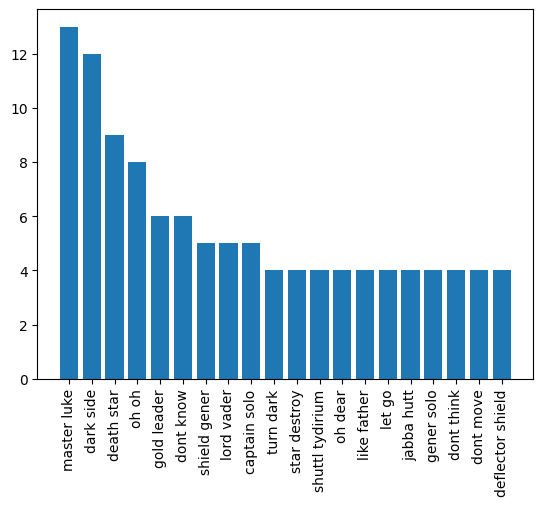

In [165]:
plt.xticks(rotation=90)
plt.bar(res_bigrams, res_nums)